   Order_ID       Product     City    Courier Promised_Date Delivery_Date  \
0      1001       Speaker   Mumbai  Delhivery    2025-08-08    2025-08-08   
1      1002        Camera   Mumbai  Shadowfax    2025-07-19    2025-07-19   
2      1003  Mobile Phone   Mumbai       DTDC    2025-07-17    2025-07-18   
3      1004    Sunglasses     Pune  Shadowfax    2025-08-08    2025-08-08   
4      1005         Shoes  Chennai       DTDC    2025-08-11    2025-08-11   

   Delay_Days On_Time_Flag   Delay_Bucket  Delay_Capped  
0           0      On Time        On Time             0  
1           0      On Time        On Time             0  
2           1         Late  1–2 Days Late             1  
3           0      On Time        On Time             0  
4           0      On Time        On Time             0  


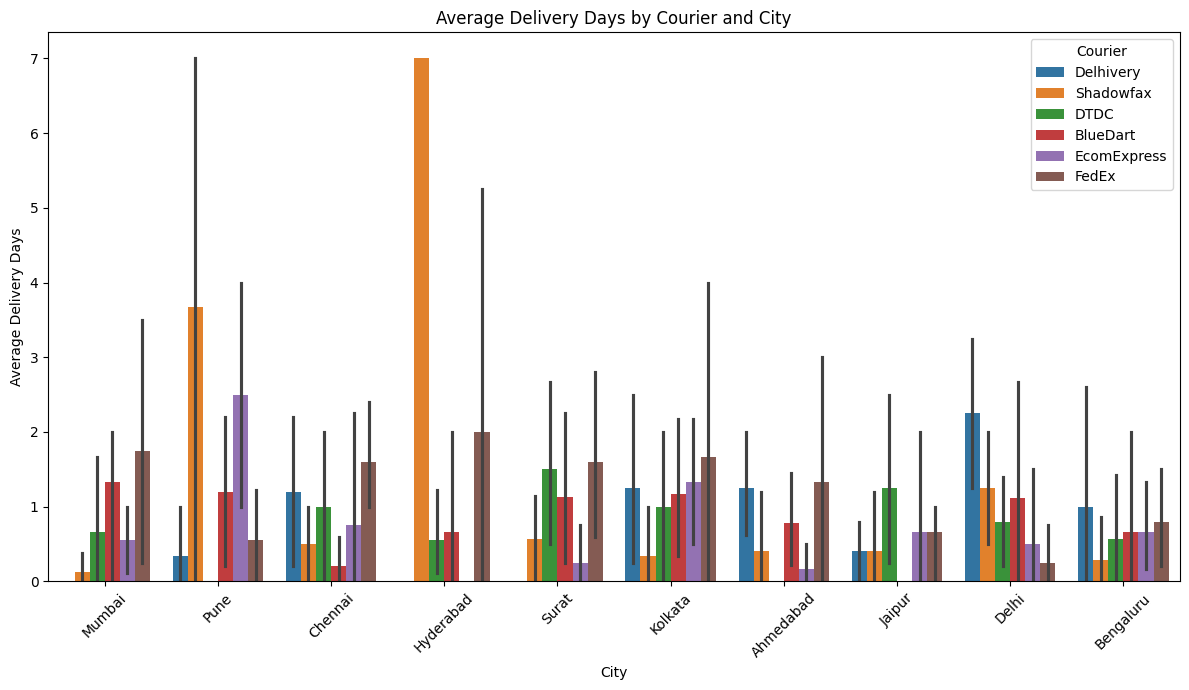

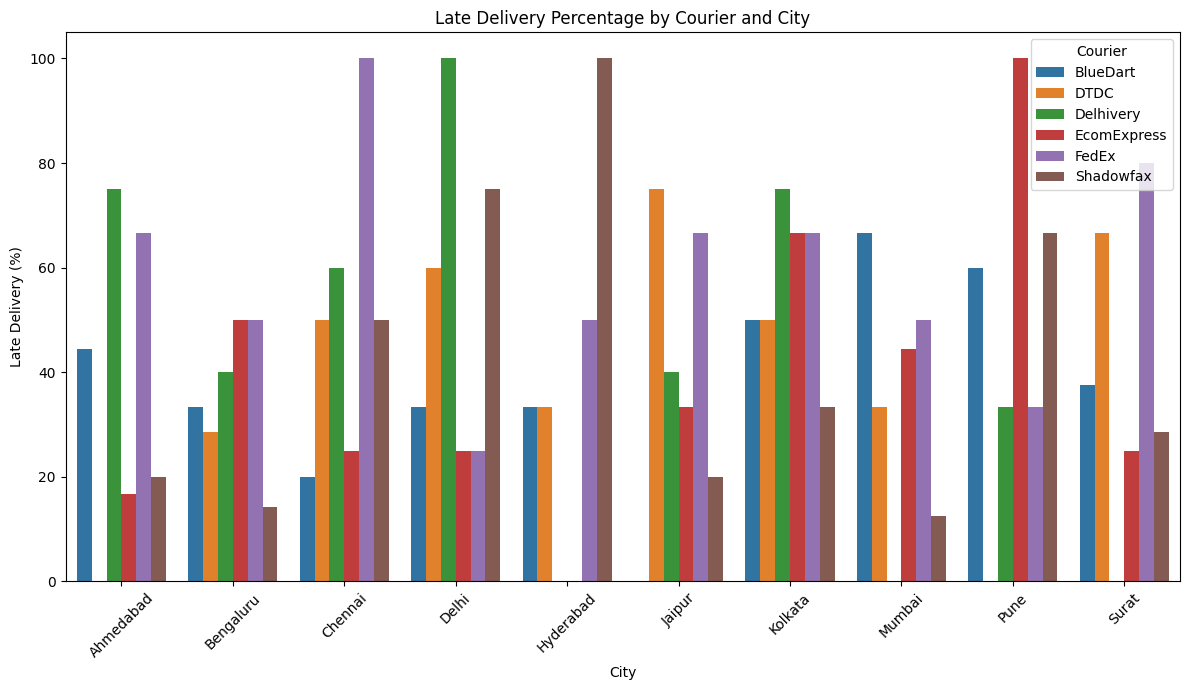

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample CSV import (replace 'courier_data.csv' with your filename)
df = pd.read_csv("/content/delivery_delay_cleaned (2).csv")

# Check the data structure
print(df.head())

# Visualization: Average Delivery Time per Courier across Cities
plt.figure(figsize=(12,7))
sns.barplot(
    x='City',
    y='Delay_Days', # Corrected column name
    hue='Courier',
    data=df
)
plt.title('Average Delivery Days by Courier and City')
plt.ylabel('Average Delivery Days')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Courier')
plt.tight_layout()
plt.show()

# Visualization: Late Delivery Percentage per Courier
# Calculate the late delivery percentage
late_delivery_percentage = df.groupby(['City', 'Courier'])['On_Time_Flag'].apply(lambda x: (x == 'Late').sum() / len(x) * 100).reset_index(name='LatePercentage')

plt.figure(figsize=(12,7))
sns.barplot(
    x='City',
    y='LatePercentage',
    hue='Courier',
    data=late_delivery_percentage
)
plt.title('Late Delivery Percentage by Courier and City')
plt.ylabel('Late Delivery (%)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Courier')
plt.tight_layout()
plt.show()